In [98]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preprocessing


# Exploring Happiness Dataset

## 2015 Dataset

In [3]:
happiness_2015_df = pd.read_csv("./data/Happiness_Dataset/2015.csv")
happiness_2015_df["Year"]=2015
happiness_2015_df.head()
print(happiness_2015_df.columns.size)
happiness_2015_df.columns

13


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

## 2016 Dataset

In [4]:
happiness_2016_df = pd.read_csv("./data/Happiness_Dataset/2016.csv")
happiness_2016_df["Year"]=2016
happiness_2016_df.head()
print(happiness_2016_df.columns.size)
happiness_2016_df.columns

14


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

## 2017 Dataset

In [5]:
happiness_2017_df = pd.read_csv("./data/Happiness_Dataset/2017.csv")
happiness_2017_df["Year"]=2017
happiness_2017_df.head()
print(happiness_2017_df.columns.size)
happiness_2017_df.columns

13


Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

## 2018 Dataset

In [6]:
happiness_2018_df = pd.read_csv("./data/Happiness_Dataset/2018.csv")
happiness_2018_df["Year"]=2018
happiness_2018_df.head()
print(happiness_2018_df.columns.size)
happiness_2018_df.columns

10


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

## 2019 Dataset

In [7]:
happiness_2019_df = pd.read_csv("./data/Happiness_Dataset/2019.csv")
happiness_2019_df["Year"]=2019
happiness_2019_df.head()
print(happiness_2019_df.columns.size)
happiness_2019_df.columns

10


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

## Insights
#### As seen from above the 2019 dataset is having the minimum number of columns which is 10. So we are adapting the other datasets to be similar to it. Also we are renaming some of the columns as they are having the same meaning but with different typing.

In [8]:
# Since the 2019 dataset does not have the same columns we are dropping the following columns. Also we do not have to keep the Region column.
# As the country column is enough. And also the 2019 dataset does not have that column.

happiness_2015_df = happiness_2015_df.drop(["Region", "Standard Error", 'Dystopia Residual'], axis=1)
happiness_2015_df= happiness_2015_df.rename(columns={"Country":"Country or region",
                                          "Happiness Score": "Score", 
                                          "Happiness Rank":"Overall rank", 
                                          "Economy (GDP per Capita)":"GDP per capita",
                                          "Health (Life Expectancy)" : "Healthy life expectancy",
                                          "Trust (Government Corruption)": "Perceptions of corruption",
                                          "Family":"Social support",
                                          "Freedom": "Freedom to make life choices"})

In [9]:
happiness_2016_df = happiness_2016_df.drop(["Region", 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
happiness_2016_df = happiness_2016_df.rename(columns={"Country":"Country or region",
                                          "Happiness Score": "Score", 
                                          "Happiness Rank":"Overall rank", 
                                          "Economy (GDP per Capita)":"GDP per capita",
                                          "Health (Life Expectancy)" : "Healthy life expectancy",
                                          "Trust (Government Corruption)": "Perceptions of corruption",
                                          "Family":"Social support",
                                          "Freedom": "Freedom to make life choices"})

In [10]:
happiness_2017_df=happiness_2017_df.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
happiness_2017_df = happiness_2017_df.rename(columns={"Country":"Country or region",
                                          "Happiness.Score": "Score", 
                                          "Happiness.Rank":"Overall rank", 
                                          "Economy..GDP.per.Capita.":"GDP per capita",
                                          "Health..Life.Expectancy." : "Healthy life expectancy",
                                          "Trust..Government.Corruption.": "Perceptions of corruption",
                                          "Family":"Social support",
                                          "Freedom": "Freedom to make life choices"})

In [11]:
happiness_df = pd.concat([happiness_2015_df,happiness_2016_df,happiness_2017_df,happiness_2018_df,happiness_2019_df])
print(happiness_df.shape)
happiness_df.head()


(782, 10)


,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


### The country names may be written in different way so we are exploring the names. 

In [12]:
np.sort(happiness_df["Country or region"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong',
       'Hong Kong S.A.R., China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'K

## As Seem from the last cell there are some countries that have different typing for example 
### 1) 'Hong Kong','Hong Kong S.A.R., China'.
### 2) 'Somaliland Region','Somaliland region'.        
### 3) 'Taiwan', 'Taiwan Province of China'.
### 4) 'Trinidad & Tobago','Trinidad and Tobago'.

In [13]:
happiness_df = happiness_df.replace('Hong Kong S.A.R., China','Hong Kong')
happiness_df = happiness_df.replace('Somaliland region','Somaliland Region')
happiness_df = happiness_df.replace('Taiwan Province of China','Taiwan')
happiness_df = happiness_df.replace('Trinidad & Tobago','Trinidad and Tobago')

In [14]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             782 non-null    object 
 1   Overall rank                  782 non-null    int64  
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Perceptions of corruption     781 non-null    float64
 8   Generosity                    782 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


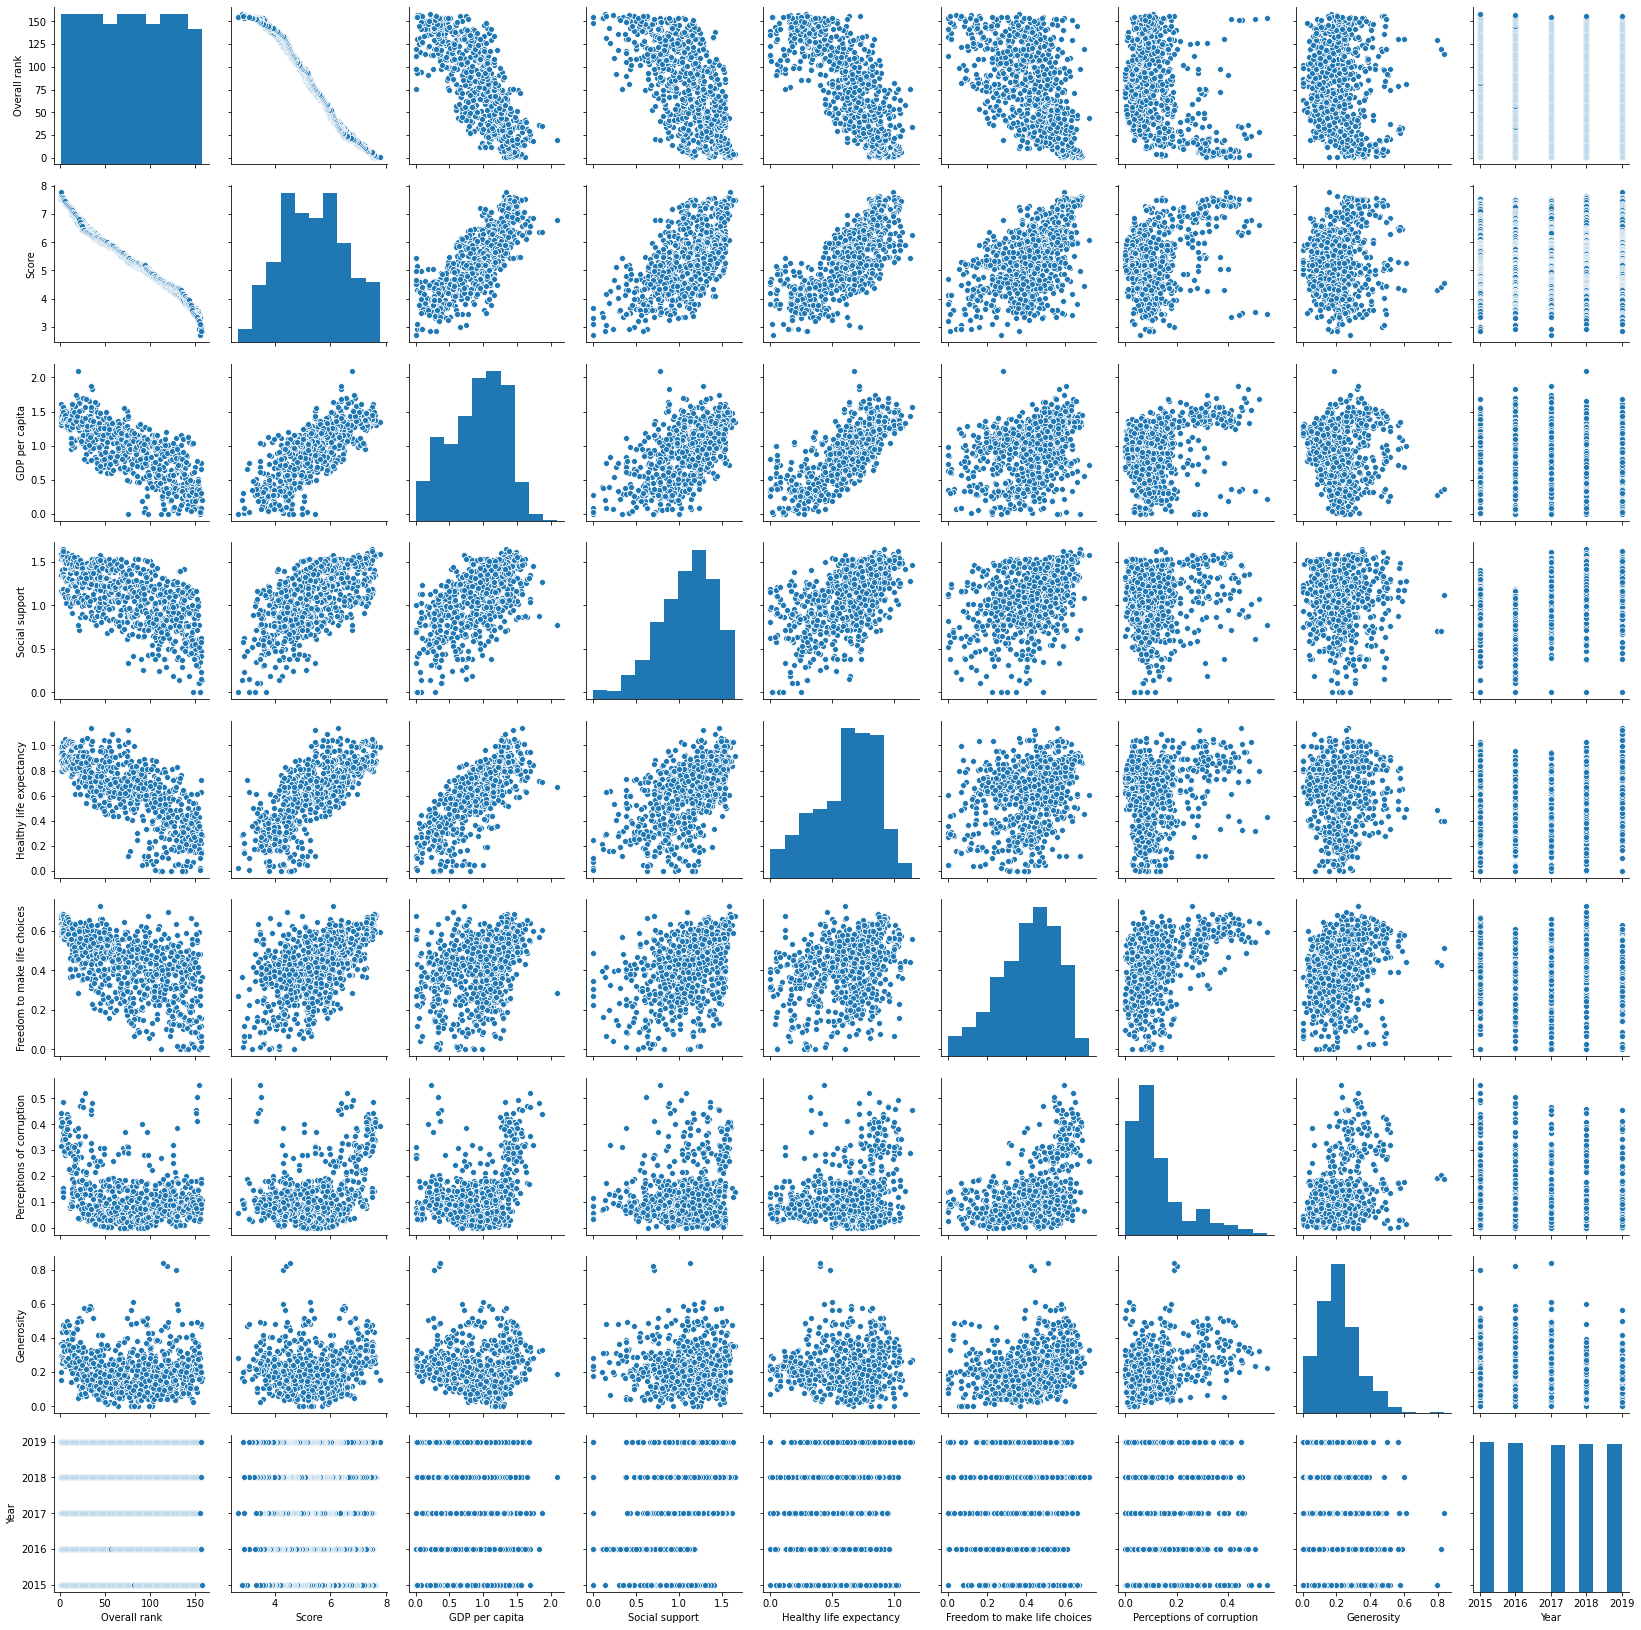

In [15]:
sns.pairplot(happiness_df)

# Exploring 250 Country Dataset

In [16]:
df_countries=pd.read_csv('data/250 Country Data.csv')
df_countries

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,NaN,NaN,NaN,NaN,NaN
246,246,Western Sahara,Africa,Northern Africa,510713,266000.0,NaN,NaN,NaN,NaN,NaN
247,247,Yemen,Asia,Western Asia,27478000,527968.0,37.7,3.8%.,65.3% (2011 est.),11.8%.,35% (2003 est.).
248,248,Zambia,Africa,Eastern Africa,15933883,752612.0,54.6,6%.,61.4% (2007 est.),7.1%.,15% (2008 est.).


In [17]:
df_countries.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
df_countries['Real Growth Rating(%)']= pd.Series(df_countries['Real Growth Rating(%)'].str.extract(r"([-+]?\d*\.*\d+|\d+)",expand=False).values.astype(float))*.01


In [19]:
df_countries['Literacy Rate(%)']= pd.Series(df_countries['Literacy Rate(%)'].str.extract(r"([-+]?\d*\.*\d+|\d+)",expand=False).values.astype(float))*.01

In [20]:
df_countries['Inflation(%)']= pd.Series(df_countries['Inflation(%)'].str.extract(r"([-+]?\d*\.*\d+|\d+)",expand=False).values.astype(float))*.01

In [21]:
df_countries['Unemployement(%)']=pd.Series( df_countries['Unemployement(%)'].str.extract(r"([-+]?\d*\.*\d+|\d+)",expand=False).values.astype(float))*.01

**removing trivial countries where the number of population is zero and most of the values are missing**

In [22]:
df_countries.drop(df_countries[df_countries.subregion.isna()].index,inplace=True)

In [23]:
df_countries.head(10)

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,0.031,0.790,0.039,0.103
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,0.030,0.970,NaN,NaN
5,Andorra,Europe,Southern Europe,78014,468.0,NaN,-0.016,1.000,0.011,0.040
6,Angola,Africa,Middle Africa,25868000,1246700.0,58.6,0.056,0.704,0.089,NaN
7,Anguilla,Americas,Caribbean,13452,91.0,NaN,0.028,NaN,0.031,0.080
9,Antigua and Barbuda,Americas,Caribbean,86295,442.0,NaN,0.017,0.990,0.030,0.110
10,Argentina,Americas,South America,43590400,2780400.0,44.5,0.035,0.979,0.208,0.075


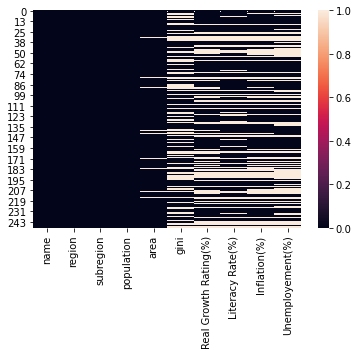

In [24]:
sns.heatmap(df_countries.isnull());

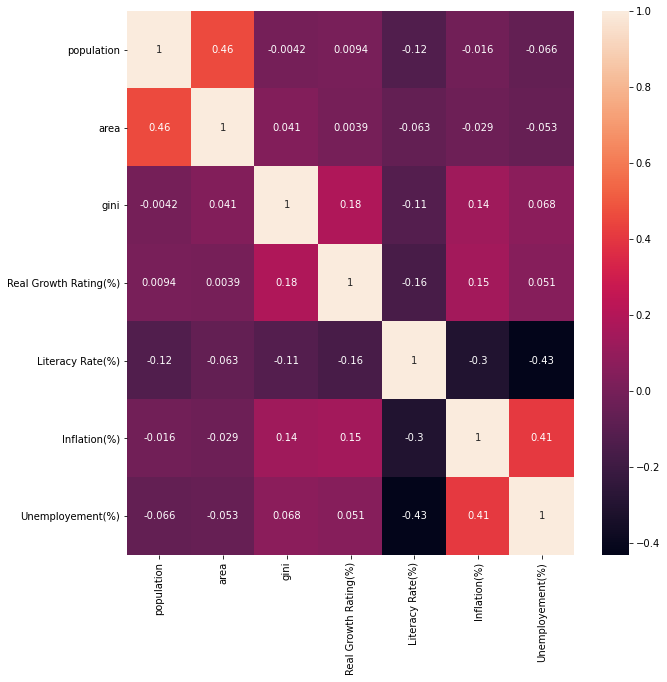

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(df_countries.corr(),annot = True)

**invistigating the coulmns with missing null values and their percentages**

In [26]:
nans = pd.DataFrame(data=[], index=None, 
                          columns=['feature_name','missing_values','percentage_of_total'])
nans['feature_name'] = df_countries.columns[df_countries.isna().sum()>0]
nans['missing_values'] = np.array(df_countries[nans.iloc[:,0]].isna().sum())
nans['percentage_of_total'] = np.round(nans['missing_values'] / df_countries.shape[0] * 100)
nans['var_type']= [df_countries[c].dtype for c in nans['feature_name']]
nans

,feature_name,missing_values,percentage_of_total,var_type
0,area,10,4.0,float64
1,gini,94,38.0,float64
2,Real Growth Rating(%),82,33.0,float64
3,Literacy Rate(%),74,30.0,float64
4,Inflation(%),83,34.0,float64
5,Unemployement(%),97,39.0,float64


**filling the missing values with the mean depending on the region groups**

In [27]:
nan_cols = list(nans['feature_name'])
for col in nan_cols:
    df_countries[col] = df_countries.groupby("region").transform(lambda x: x.fillna(x.mean()))[col]

In [28]:
df_countries.head(20)

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.031000,0.281000,0.068000,0.350000
1,Åland Islands,Europe,Northern Europe,28875,1580.0,31.816216,0.012026,0.981730,0.018973,0.102027
2,Albania,Europe,Southern Europe,2886026,28748.0,34.500000,0.007000,0.987000,0.017000,0.169000
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.300000,0.031000,0.790000,0.039000,0.103000
4,American Samoa,Oceania,Polynesia,57100,199.0,40.100000,0.030000,0.970000,1.281375,0.173715
5,Andorra,Europe,Southern Europe,78014,468.0,31.816216,-0.016000,1.000000,0.011000,0.040000
6,Angola,Africa,Middle Africa,25868000,1246700.0,58.600000,0.056000,0.704000,0.089000,0.280621
7,Anguilla,Americas,Caribbean,13452,91.0,48.703704,0.028000,0.919778,0.031000,0.080000
9,Antigua and Barbuda,Americas,Caribbean,86295,442.0,48.703704,0.017000,0.990000,0.030000,0.110000
10,Argentina,Americas,South America,43590400,2780400.0,44.500000,0.035000,0.979000,0.208000,0.075000


**visualization of the null values they are gone**

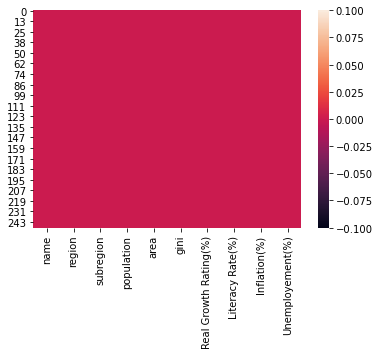

In [29]:
sns.heatmap(df_countries.isnull());

# exploring and cleaning the Expectancy Data

In [30]:
df_life_expectancy=pd.read_csv("data/Life Expectancy Data.csv")

**change the binary-category attribure to 0/1** 

In [31]:
df_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [32]:
df_life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [33]:
thin5_9=np.array((df_life_expectancy[' thinness 5-9 years']).tolist())
thin1_19=np.array((df_life_expectancy[' thinness  1-19 years']).tolist())
thin5_9=thin5_9[~np.isnan(thin5_9)]
thin1_19=thin1_19[~np.isnan(thin1_19)]

print(thin5_9.std(),thin1_19.std())
print(thin5_9.mean(),thin1_19.mean())

4.508105697465929 4.419433828766376
4.870316804407714 4.839703856749312


Text(0, 0.5, 'thin1_19')

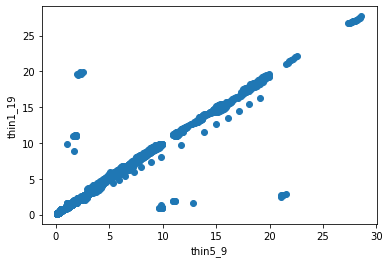

In [34]:
fig=plt.scatter(thin5_9,thin1_19)
plt.xlabel("thin5_9")
plt.ylabel('thin1_19')

**as shown from the graph, the mean and the standard deviation values the two variables seem to be highly correlated so we remove one of them with smaller year range 5-9.**

In [35]:
df_life_expectancy = df_life_expectancy.drop(' thinness 5-9 years', axis=1)

In [36]:
df_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


# filling in the missing values and outliers.

**visualizing the null values**

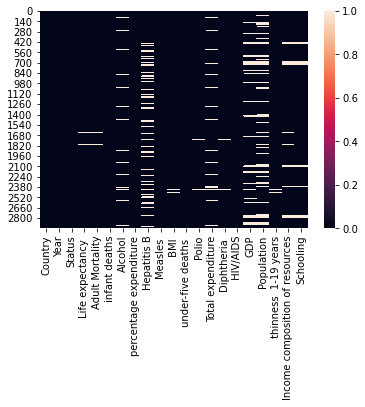

In [37]:
sns.heatmap(df_life_expectancy.isnull());

**visualizing the correlation between the attribures.**

**Visualizing the null values and their percentages**

In [38]:
#columns with null values
nans = pd.DataFrame(data=[], index=None, 
                          columns=['feature_name','missing_values','percentage_of_total'])
nans['feature_name'] = df_life_expectancy.columns[df_life_expectancy.isna().sum()>0]
nans['missing_values'] = np.array(df_life_expectancy[nans.iloc[:,0]].isna().sum())
nans['percentage_of_total'] = np.round(nans['missing_values'] / df_life_expectancy.shape[0] * 100)
nans['var_type']= [df_life_expectancy[c].dtype for c in nans['feature_name']]
nans

,feature_name,missing_values,percentage_of_total,var_type
0,Life expectancy,10,0.0,float64
1,Adult Mortality,10,0.0,float64
2,Alcohol,194,7.0,float64
3,Hepatitis B,553,19.0,float64
4,BMI,34,1.0,float64
5,Polio,19,1.0,float64
6,Total expenditure,226,8.0,float64
7,Diphtheria,19,1.0,float64
8,GDP,448,15.0,float64
9,Population,652,22.0,float64


In [39]:
#make list of columns with up to 50 nan, impute these with column mean
nan_cols = nans['feature_name'][nans['missing_values']<=50]
for col in nan_cols:
    mean_ = df_life_expectancy[col].mean()
    #df_life_expectancy[col][df_life_expectancy[col].isna()==True] = mean_
    df_life_expectancy.loc[df_life_expectancy[col].isna()==True,col]=mean_
   # df_life_expectancy.loc[df_life_expectancy['Country']==i,col] = df_life_expectancy[col][df_life_expectancy['Country'] == i].mean()


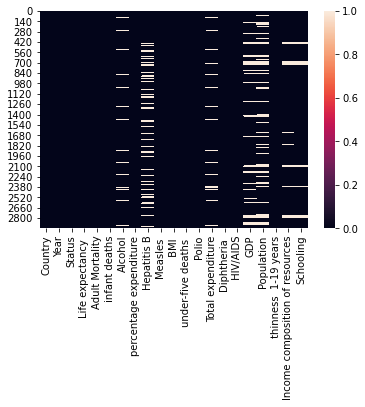

In [40]:
sns.heatmap(df_life_expectancy.isnull());

In [41]:
#columns with null values
nans = pd.DataFrame(data=[], index=None, 
                          columns=['feature_name','missing_values','percentage_of_total'])
nans['feature_name'] = df_life_expectancy.columns[df_life_expectancy.isna().sum()>0]
nans['missing_values'] = np.array(df_life_expectancy[nans.iloc[:,0]].isna().sum())
nans['percentage_of_total'] = np.round(nans['missing_values'] / df_life_expectancy.shape[0] * 100)
nans['var_type']= [df_life_expectancy[c].dtype for c in nans['feature_name']]
nans

,feature_name,missing_values,percentage_of_total,var_type
0,Alcohol,194,7.0,float64
1,Hepatitis B,553,19.0,float64
2,Total expenditure,226,8.0,float64
3,GDP,448,15.0,float64
4,Population,652,22.0,float64
5,Income composition of resources,167,6.0,float64
6,Schooling,163,6.0,float64


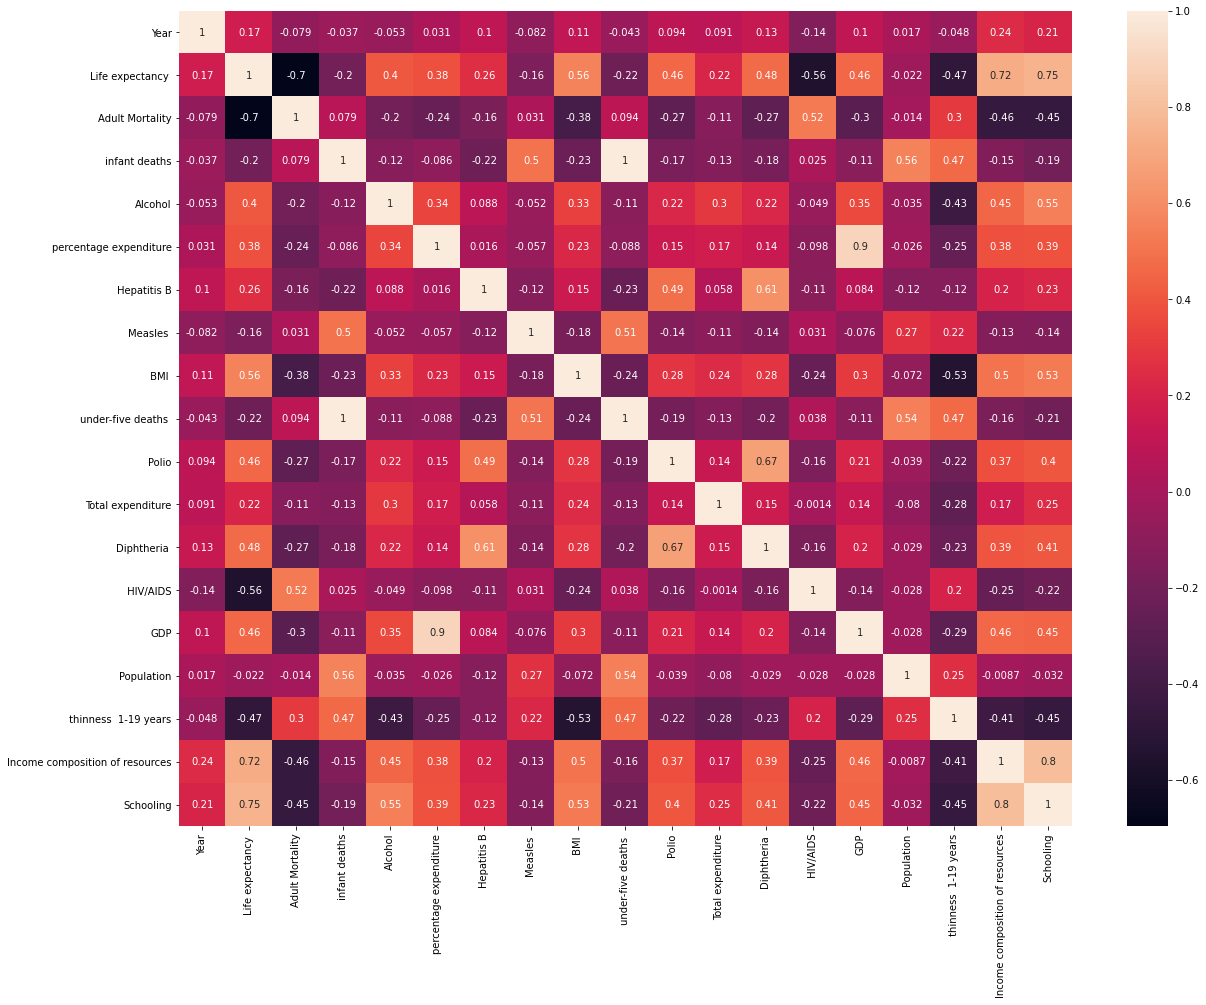

In [42]:
plt.figure(figsize = (20,15))
sns.heatmap(df_life_expectancy.corr(),annot = True)

In [43]:
def impute(df, to_impute, reference):
    index=df[to_impute][(df[to_impute].isna()==True)&
                    (df[reference].isna()==False)].keys()
    #df['Total expenditure'][index]
    var_min = df[reference].min()
    var_max = df[reference].max()
    range_filler =  var_max - var_min
    step = range_filler / 10
    one = df[to_impute][df[reference] < (var_min+step)].mean()
    two = df[to_impute][(df[reference] > (var_min+step))&
              (df[reference] < (var_min+step*2))].mean()
    three = df[to_impute][(df[reference] > (var_min+step*2))&
              (df[reference] < (var_min+step*3))].mean()
    four = df[to_impute][(df[reference] > (var_min+step*3))&
              (df[reference] < (var_min+step*4))].mean()
    five = df[to_impute][(df[reference] > (var_min+step*4))&
              (df[reference] < (var_min+step*5))].mean()
    six = df[to_impute][(df[reference] > (var_min+step*5))&
              (df[reference] < (var_min+step*6))].mean()
    seven = df[to_impute][(df[reference] > (var_min+step*6))&
              (df[reference] < (var_min+step*7))].mean()
    eight = df[to_impute][(df[reference] > (var_min+step*7))&
              (df[reference] < (var_min+step*8))].mean()
    nine = df[to_impute][(df[reference] > (var_min+step*8))&
              (df[reference] < (var_min+step*9))].mean()
    ten = df[to_impute][df[reference] > (var_max-step)].mean()
    
    for i in index:
        if df[reference][i] < (var_min+step):
            df[to_impute][i]=one
        elif df[reference][i] < (var_min+step*2):
                df[to_impute][i]=two
                continue
        elif df[reference][i] < (var_min+step*3):
                df[to_impute][i]=three
                continue
        elif df[reference][i] < (var_min+step*4):
                df[to_impute][i]=four
                continue
        elif df[reference][i] < (var_min+step*5):
                df[to_impute][i]=five
                continue
        elif df[reference][i] < (var_min+step*6):
                df[to_impute][i]=six
                continue
        elif df[reference][i] < (var_min+step*7):
                df[to_impute][i]=seven
                continue
        elif df[reference][i] < (var_min+step*8):
                df[to_impute][i]=eight
                continue
        elif df[reference][i] < (var_min+step**9):
                df[to_impute][i]=nine
                continue
        else:
            df[to_impute][i]=ten

In [44]:
impute(df_life_expectancy, 'GDP', 'Total expenditure')
impute(df_life_expectancy, 'Total expenditure', 'GDP')
df_life_expectancy.loc[df_life_expectancy['GDP'].isna() == True,'GDP'] =df_life_expectancy['GDP'].mean()
df_life_expectancy.loc[df_life_expectancy['Total expenditure'].isna()==True,'Total expenditure']=df_life_expectancy['Total expenditure'].mean()

impute(df_life_expectancy, 'Alcohol', 'Schooling')
impute(df_life_expectancy, 'Schooling', 'Alcohol')
df_life_expectancy.loc[df_life_expectancy['Alcohol'].isna() == True,'Alcohol'] =df_life_expectancy['Alcohol'].mean()
df_life_expectancy.loc[df_life_expectancy['Schooling'].isna()==True,'Schooling']=df_life_expectancy['Schooling'].mean()

impute(df_life_expectancy, 'Hepatitis B', 'Diphtheria ')
df_life_expectancy.loc[df_life_expectancy['Hepatitis B'].isna() == True,'Hepatitis B'] =df_life_expectancy['Hepatitis B'].mean()

impute(df_life_expectancy, 'Population', 'infant deaths')
df_life_expectancy.loc[df_life_expectancy['Population'].isna() == True,'Population'] =df_life_expectancy['Population'].mean()

impute(df_life_expectancy, 'Income composition of resources', 'Schooling')
df_life_expectancy.loc[df_life_expectancy['Income composition of resources'].isna() == True,'Income composition of resources'] =df_life_expectancy['Income composition of resources'].mean()

<ipython-input-43-eda4f3f4b630>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[to_impute][i]=five
<ipython-input-43-eda4f3f4b630>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[to_impute][i]=four
<ipython-input-43-eda4f3f4b630>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[to_impute][i]=three
<ipython-input-43-eda4f3f4b630>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [45]:
df_life_expectancy.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

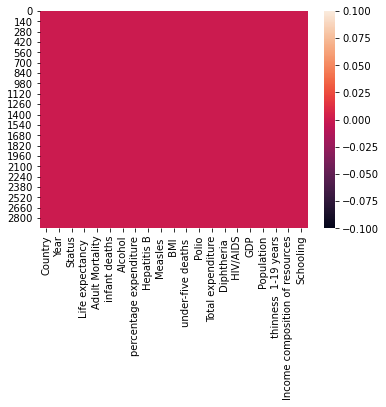

In [46]:
sns.heatmap(df_life_expectancy.isnull());

in the comming cells we will remove the outliers inside each country through out the 15 year and replace them with the mean of thier country-categories with Z-score technique with threshold =2 

In [47]:
def outlier_replace(col):
    countries=df_life_expectancy['Country'].unique()
    groups=df_life_expectancy.groupby('Country')
    count=0
    for i in countries:
        for j in groups.get_group(i)[col]:
            threshold = 3
            mean = np.mean(groups.get_group(i)[col])
            std = np.std(groups.get_group(i)[col])
            if std != 0:                     
                z_score = (j - mean) / std
                if np.abs(z_score) > threshold:
                    df_life_expectancy.loc[df_life_expectancy['Country']==i,col] = df_life_expectancy[col][df_life_expectancy['Country'] == i].mean()
                    count+=1
    print('the number of outliers detected in column '+str(col)+'is '+str(count))                

**outlier detection in life expectancy data visualizing the box blots of the Variables** 

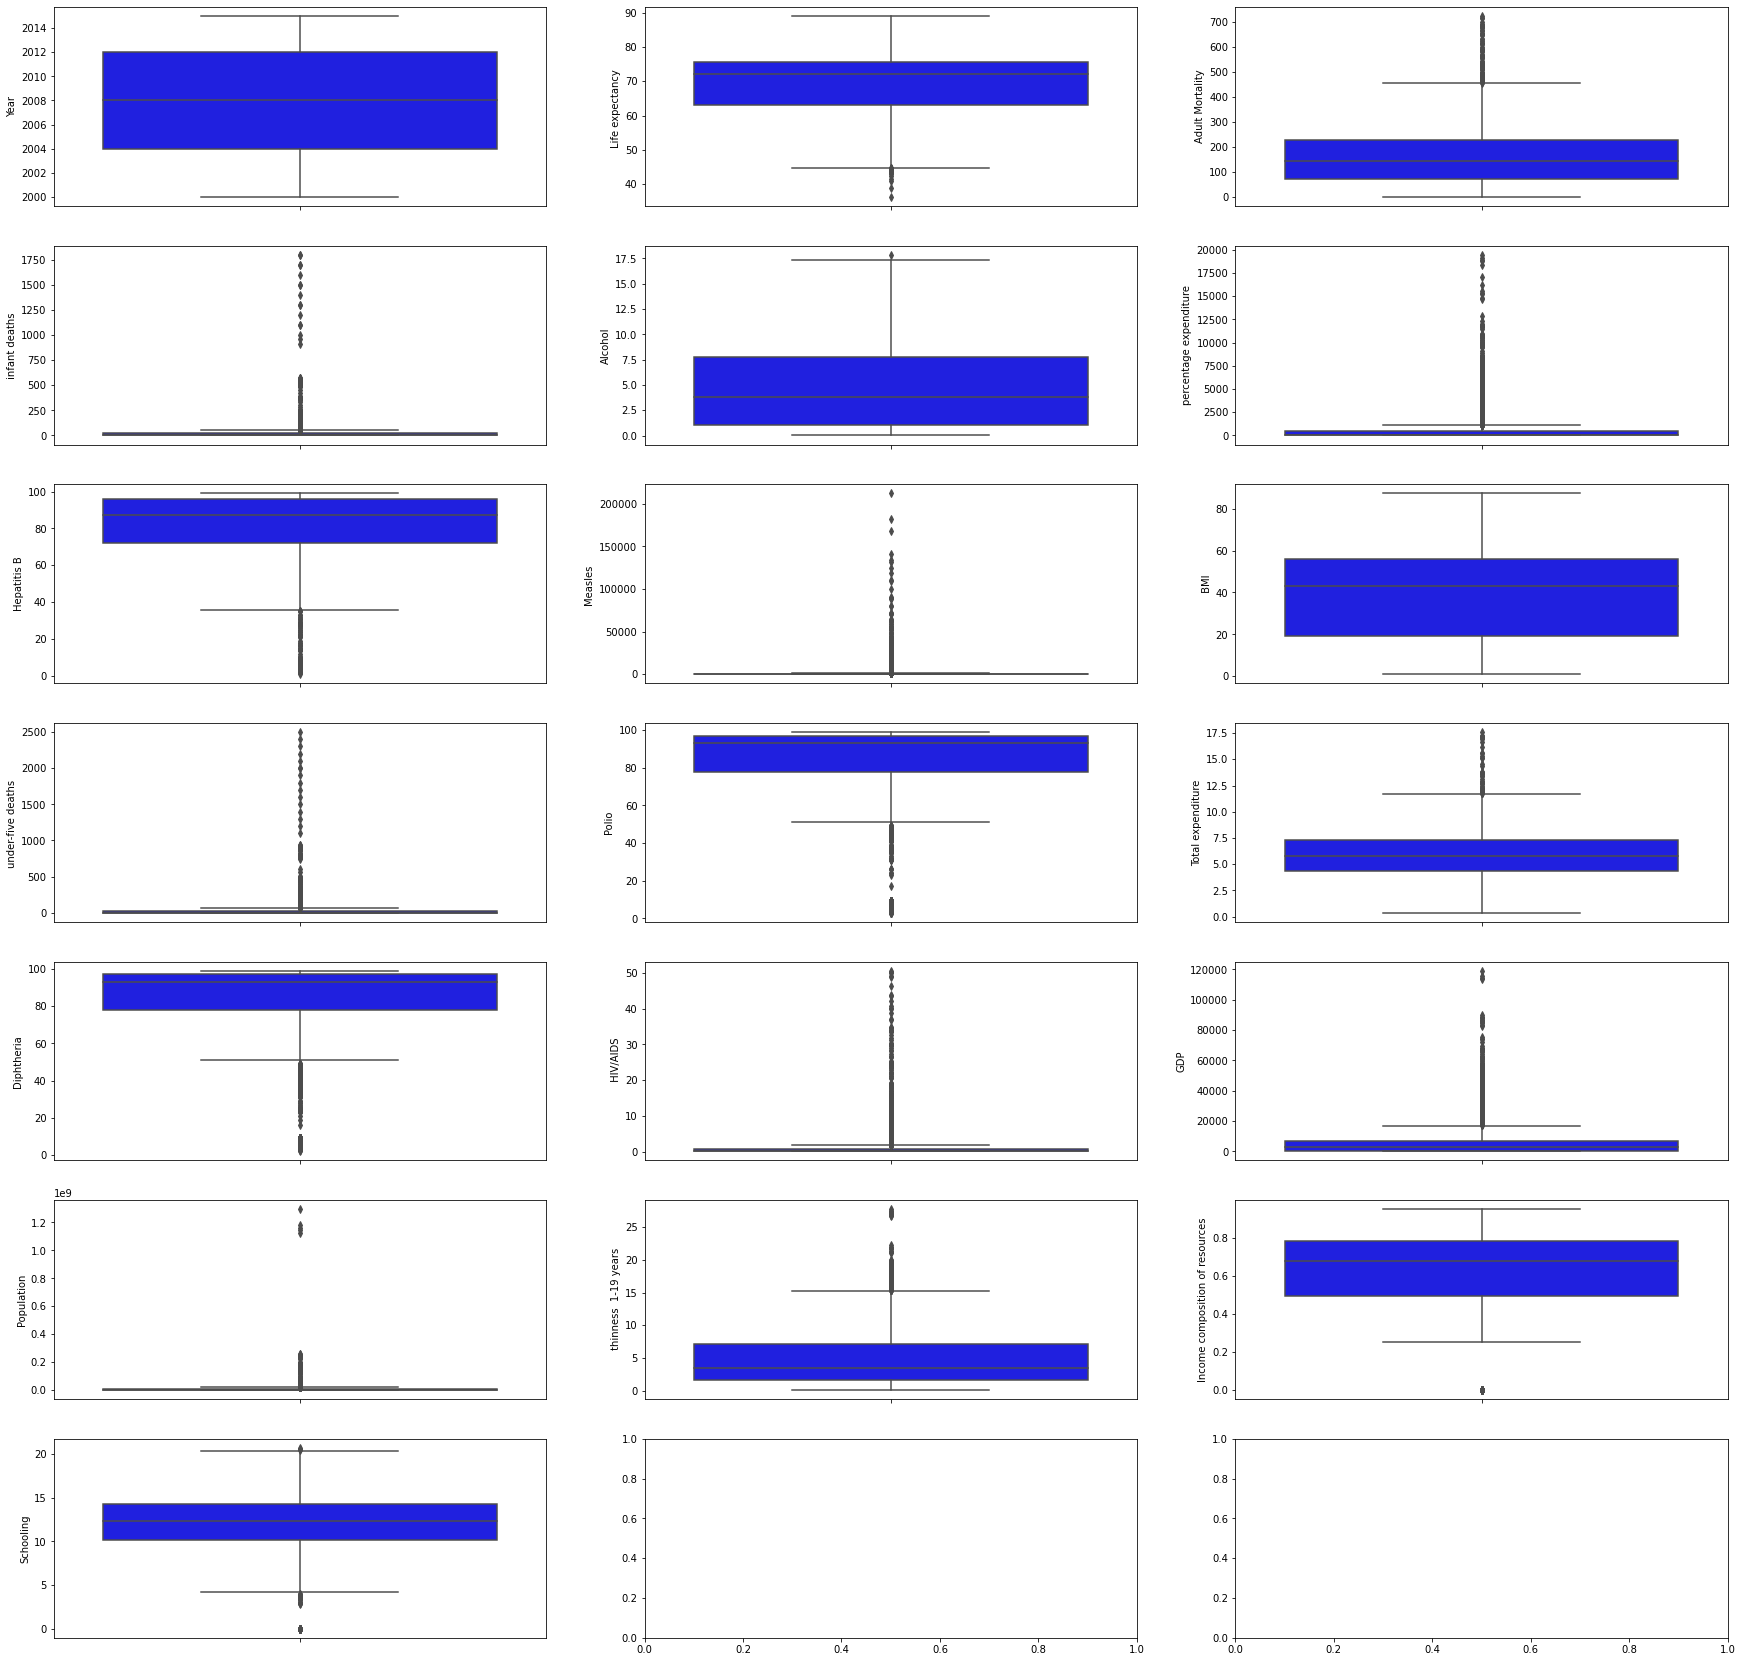

In [48]:
dataplt=df_life_expectancy
dataplt = dataplt.drop(['Status'],axis=1)
dataplt = dataplt.drop(['Country'],axis=1)
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(30, 30))
index = 0
axs = axs.flatten()
for k,v in dataplt.items():
    sns.boxplot(y=k, data=dataplt, ax=axs[index],color = 'b')
    index += 1

In [49]:
cols=df_life_expectancy.columns.tolist()
cols.remove('Country')
cols.remove('Year')
cols.remove('Status')
cols

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 'Income composition of resources',
 'Schooling']

# removing the z-score outliers.

In [50]:
for col in cols:
    outlier_replace(col)

the number of outliers detected in column Life expectancy is 8
the number of outliers detected in column Adult Mortalityis 38
the number of outliers detected in column infant deathsis 3
the number of outliers detected in column Alcoholis 165
the number of outliers detected in column percentage expenditureis 3
the number of outliers detected in column Hepatitis Bis 76
the number of outliers detected in column Measles is 98
the number of outliers detected in column  BMI is 113
the number of outliers detected in column under-five deaths is 8
the number of outliers detected in column Poliois 55
the number of outliers detected in column Total expenditureis 48
the number of outliers detected in column Diphtheria is 49
the number of outliers detected in column  HIV/AIDSis 5
the number of outliers detected in column GDPis 24
the number of outliers detected in column Populationis 2
the number of outliers detected in column  thinness  1-19 yearsis 5
the number of outliers detected in column Inco

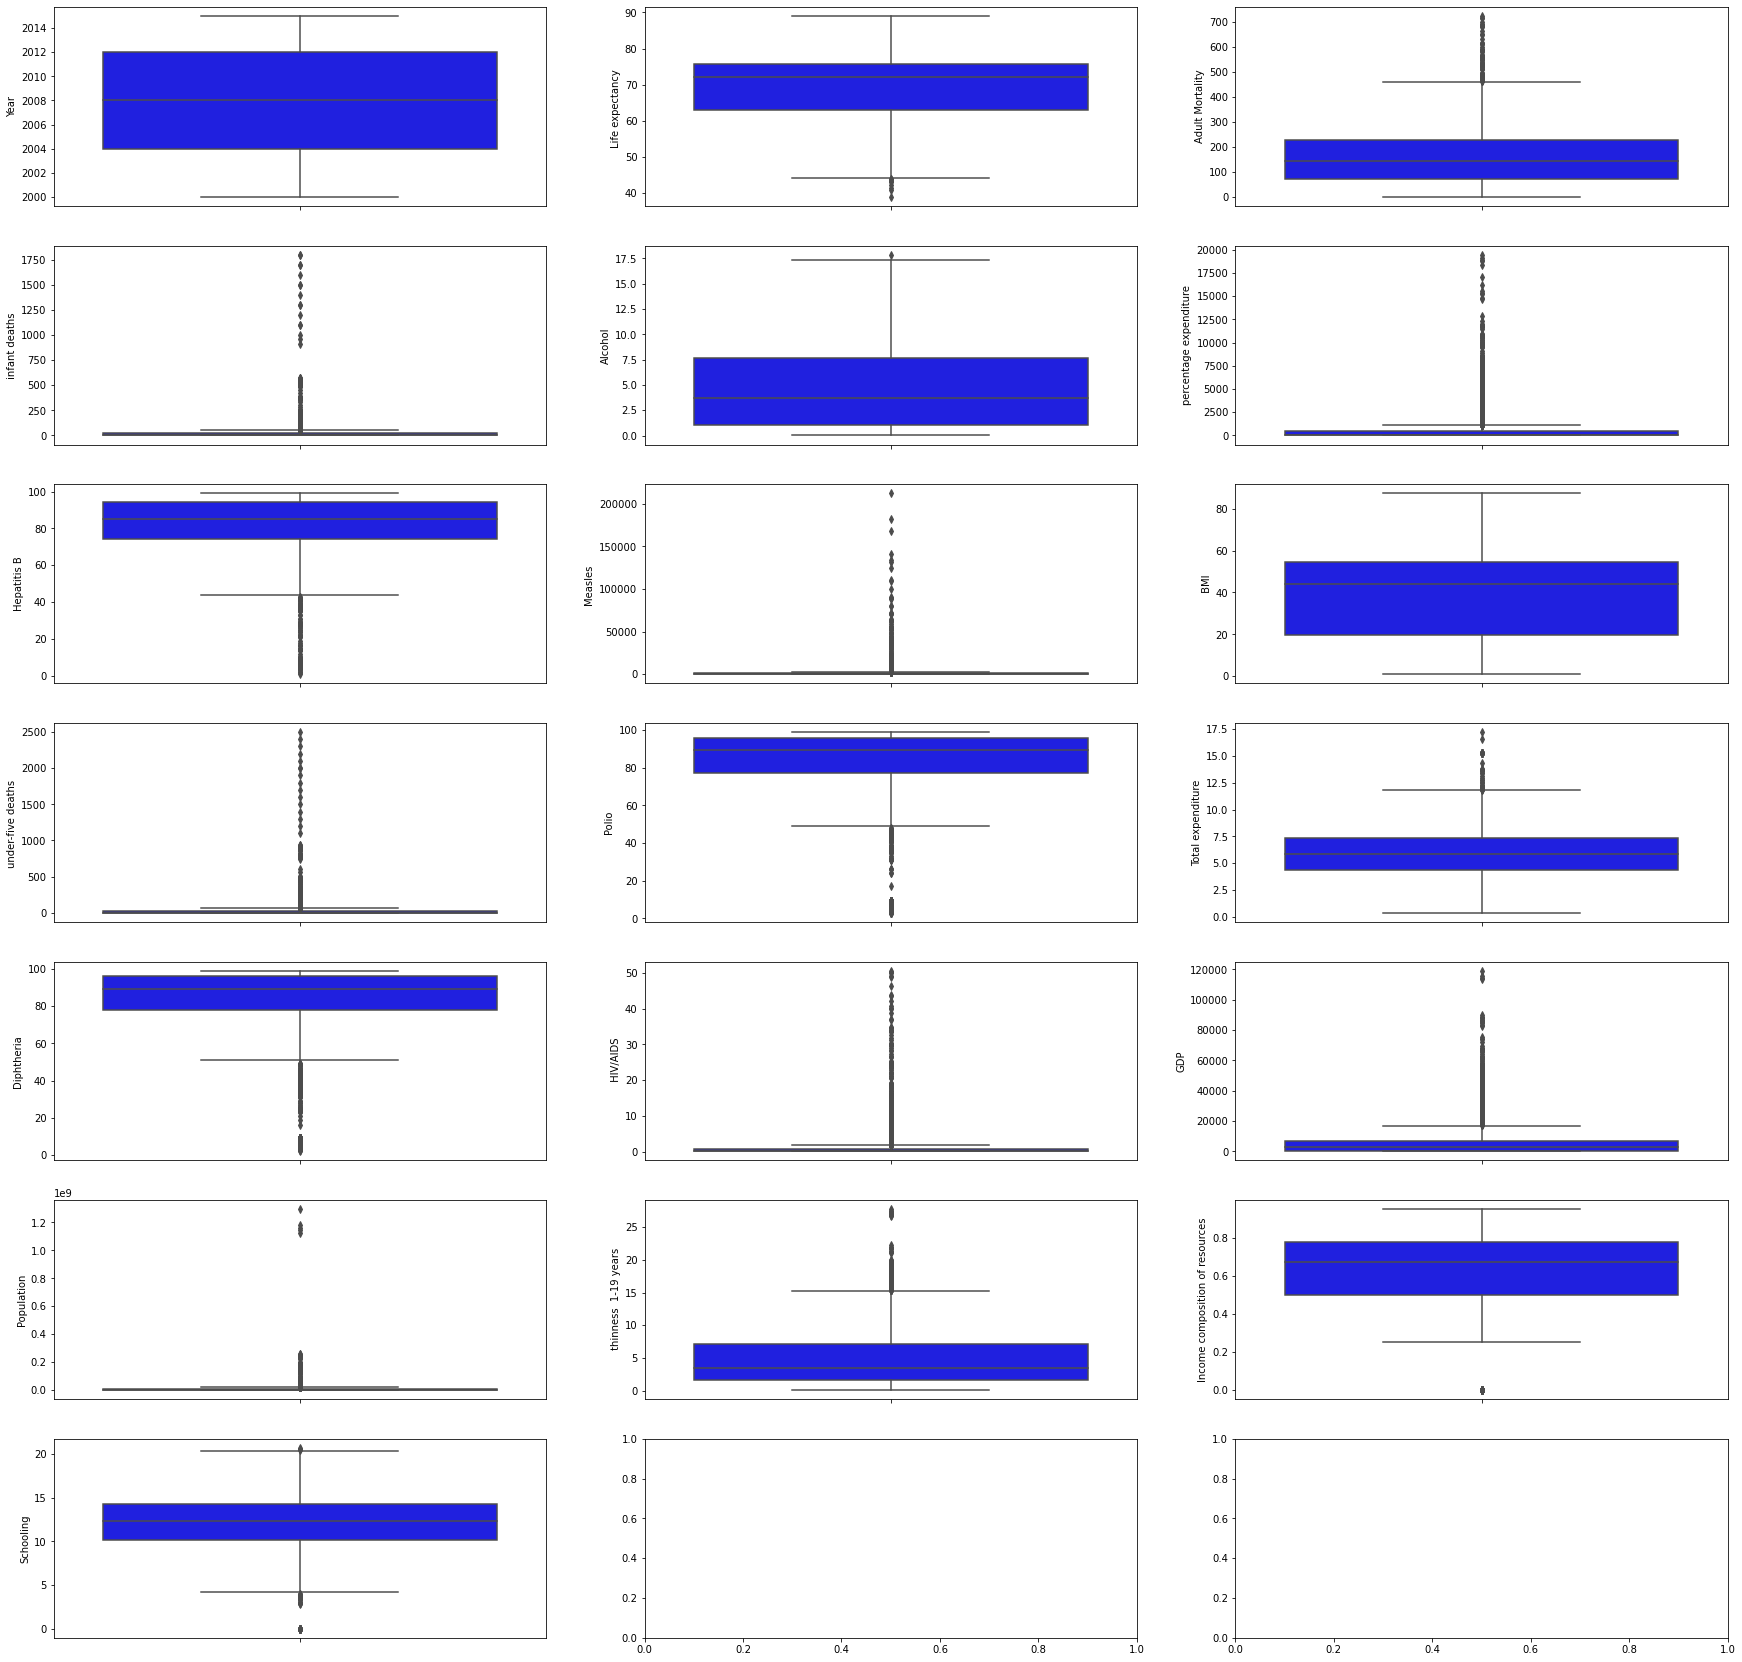

In [51]:
dataplt=df_life_expectancy
dataplt = dataplt.drop(['Status'],axis=1)
dataplt = dataplt.drop(['Country'],axis=1)
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(30, 30))
index = 0
axs = axs.flatten()
for k,v in dataplt.items():
    sns.boxplot(y=k, data=dataplt, ax=axs[index],color = 'b')
    index += 1

**we can see that a considerable number of  outliers have been removed but also still there is many outliers the reason for that is they might be true outliers and removing them will not benifit the analysis**

# Data Integration.

**first try to merge the 250-country dataset with the happiness dataset**

In [52]:
Ucount=df_countries['name'].unique()
Uhapp=happiness_df['Country or region'].unique()

count=0
for i in Uhapp:
    
    if not (np.any(Ucount==i)):
        print(i)
        count+=1
print(count)        
        

United States
United Kingdom
Venezuela
South Korea
Bolivia
Moldova
Russia
North Cyprus
Kosovo
Vietnam
Somaliland Region
Macedonia
Laos
Palestinian Territories
Iran
Congo (Kinshasa)
Congo (Brazzaville)
Tanzania
Ivory Coast
Syria
Northern Cyprus
North Macedonia
22


**from the previous cell it appears that there are some countries that are in the happiness dataset and not in the countries data set which is not correct , these countries exist in the countreis data set but with different naming so we will try to make them the same name in both data sets**

In [53]:
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['United States'],'United States of America')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['United Kingdom'],'United Kingdom of Great Britain and Northern Ireland')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Venezuela'],'Venezuela (Bolivarian Republic of)')
'Bolivia (Plurinational State of)'
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Bolivia'],'Bolivia (Plurinational State of)')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Moldova'],'Moldova (Republic of)')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Russia'],'Russian Federation')

happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Kosovo'],'Republic of Kosovo')
# here we change in df_coutries dataset
df_countries['name'] = df_countries['name'].replace(['Viet Nam'],'Vietnam')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Macedonia'],'Macedonia (the former Yugoslav Republic of)')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Laos'],"Lao People's Democratic Republic")
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Palestinian Territories'],'Palestine, State of')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Iran'],'Iran (Islamic Republic of)')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Tanzania'],'Tanzania, United Republic of')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Ivory Coast'],'Côte d\'Ivoire')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Syria'],'Syrian Arab Republic')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['South Korea'],"Korea (Democratic People's Republic of)")
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Congo (Kinshasa)'],'Congo (Democratic Republic of the)')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['Congo (Brazzaville)'],'Congo')
happiness_df['Country or region'] = happiness_df['Country or region'].replace(['North Macedonia'],'Macedonia (the former Yugoslav Republic of)')







In [54]:
Ucount=df_countries['name'].unique()
Uhapp=happiness_df['Country or region'].unique()

count=0
for i in Uhapp:
    
    if not (np.any(Ucount==i)):
        print(i)
        count+=1
print(count) 

North Cyprus
Somaliland Region
Northern Cyprus
3


**as we can see from the previous cell we have renamed the countries of the happiness data set to the corresponding same names in the countries data set but the remaining three countries have no correspondings in the countries data set so we will remove them** 

In [55]:
df_countries_happiness=pd.merge(df_countries,happiness_df,left_on="name",right_on='Country or region')
df_countries_happiness.head(15)

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350,Afghanistan,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350,Afghanistan,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350,Afghanistan,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,0.031,0.281,0.068,0.350,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
5,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169,Albania,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,2015
6,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169,Albania,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,2016
7,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169,Albania,109,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,2017
8,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169,Albania,112,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,2018
9,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.007,0.987,0.017,0.169,Albania,107,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,2019


In [56]:
df_countries_happiness=df_countries_happiness.drop(['Country or region'],axis=1).rename(columns={"name": "country"})
df_countries_happiness

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
771,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2016
772,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,2017
773,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018


**let's move on to merge the life expectancy data and the countries dataset**

In [57]:
df_life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,269.0625,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.000,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,269.0625,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.000,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,269.0625,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.000,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,269.0625,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.000,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,269.0625,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.000,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0000,27.0,4.36,0.000000,68.0,923.0,...,42.0,75.625,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0000,26.0,4.06,0.000000,7.0,923.0,...,41.0,75.625,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0000,25.0,4.43,0.000000,73.0,923.0,...,40.0,75.625,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0000,25.0,1.72,0.000000,76.0,923.0,...,39.0,75.625,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [58]:
Ucount=df_countries['name'].unique()
Uexep=df_life_expectancy['Country'].unique()

count=0
for i in Uexep:
    
    if not (np.any(Ucount==i)):
        print(i)
        count+=1
print(count) 

Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Republic of Korea
Republic of Moldova
The former Yugoslav republic of Macedonia
United Republic of Tanzania
Viet Nam
8


**in the life_expectancy df we also have some countries which are not in the countries data set so we will try to rename them** 

In [59]:
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Czechia'],'Czech Republic')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Democratic People\'s Republic of Korea'],"Korea (Democratic People's Republic of)")
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Republic of Korea'],'Korea (Republic of)')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Republic of Korea'],'Korea (Republic of)')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['The former Yugoslav republic of Macedonia'],'Macedonia (the former Yugoslav Republic of)')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['United Republic of Tanzania'],'Tanzania, United Republic of')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Viet Nam'],'Vietnam')
df_life_expectancy['Country'] = df_life_expectancy['Country'].replace(['Democratic Republic of the Congo'],'Congo (Democratic Republic of the)')





In [60]:
Ucount=df_countries['name'].unique()
Uexep=df_life_expectancy['Country'].unique()

count=0
for i in Uexep:
    
    if not (np.any(Ucount==i)):
        print(i)
        count+=1
print(count) 

Republic of Moldova
1


# merging the life_expectancy data set with the country data set.

In [61]:
df_countries_expectancy=pd.merge(df_countries,df_life_expectancy,left_on="name",right_on='Country')
df_countries_expectancy

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,83.0,6.000,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,86.0,58.000,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,89.0,62.000,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,93.0,67.000,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,97.0,68.000,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,42.0,75.625,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2
2918,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,41.0,75.625,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5
2919,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,40.0,75.625,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0
2920,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,39.0,75.625,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [62]:
df_countries_expectancy=df_countries_expectancy.drop(['Country'],axis=1).rename(columns={"name": "country"})
df_countries_expectancy
                                                        

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,83.0,6.000,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,86.0,58.000,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,89.0,62.000,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,93.0,67.000,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,97.0,68.000,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,42.0,75.625,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2
2918,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,41.0,75.625,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5
2919,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,40.0,75.625,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0
2920,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,39.0,75.625,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8


# Questions and answers

# A) countries_happiness data set

In [63]:
df_countries_happiness

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
771,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2016
772,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,2017
773,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018


# Q1) since we are interested more about the happiness rank and score, What are the attributes that have impact on the happiness score for countries.

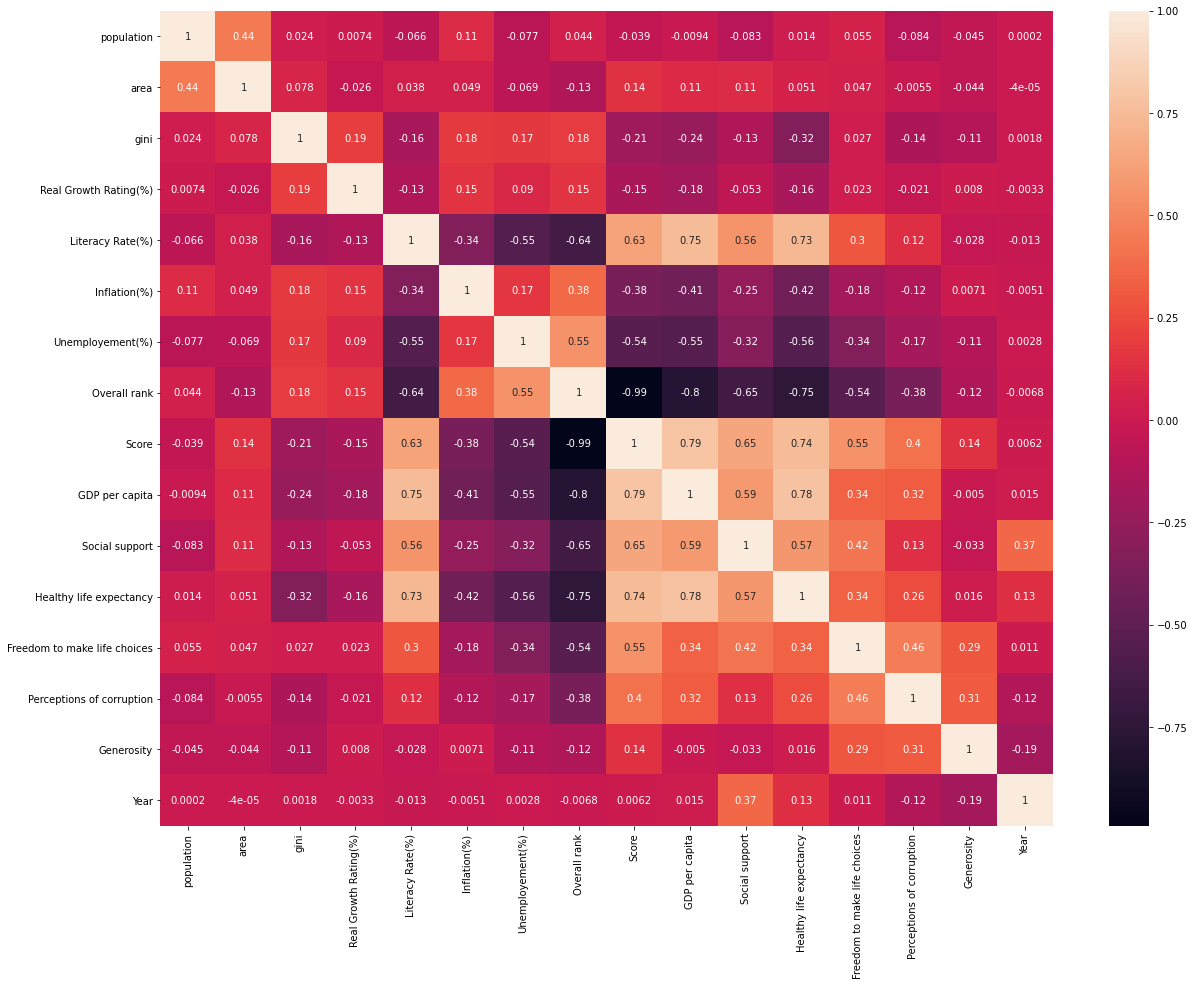

In [64]:
plt.figure(figsize = (20,15))
sns.heatmap(df_countries_happiness.corr(),annot = True)

**from this heat-map of the correlation between all variables and each other it appears that:
'freedom to make life choices','healthy life expectancey''social support','GDP per captia','literacy rate' are positively correlated with the happiness score with different ratios depending on each attribute and the 'unemployment' attribute is negatively correlated with the happiness score**



    

# Q2) How does 'Literacy rate%' affect the happiness score differently in each continent using the average of both variables during the last five years? or are the countries with high percentage of litracy more happier?

In [65]:
mean_df=df_countries_happiness.groupby(['country','region'],as_index=False).mean()
mean_df

,country,region,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,Asia,27657145.0,652230.0,27.800000,0.031000,0.281000,0.068000,0.350000,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2017.0
1,Albania,Europe,2886026.0,28748.0,34.500000,0.007000,0.987000,0.017000,0.169000,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,2017.0
2,Algeria,Africa,40400000.0,2381741.0,35.300000,0.031000,0.790000,0.039000,0.103000,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,2017.0
3,Angola,Africa,25868000.0,1246700.0,58.600000,0.056000,0.704000,0.089000,0.280621,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,2016.5
4,Argentina,Americas,43590400.0,2780400.0,44.500000,0.035000,0.979000,0.208000,0.075000,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela (Bolivarian Republic of),Americas,31028700.0,916445.0,44.800000,0.044766,0.919778,0.041818,0.111794,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,2017.0
158,Vietnam,Asia,92700000.0,331212.0,35.600000,0.051635,0.857553,0.052703,0.112108,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,2017.0
159,Yemen,Asia,27478000.0,527968.0,37.700000,0.038000,0.653000,0.118000,0.350000,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,2017.0
160,Zambia,Africa,15933883.0,752612.0,54.600000,0.060000,0.614000,0.071000,0.150000,114.0,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430,2017.0


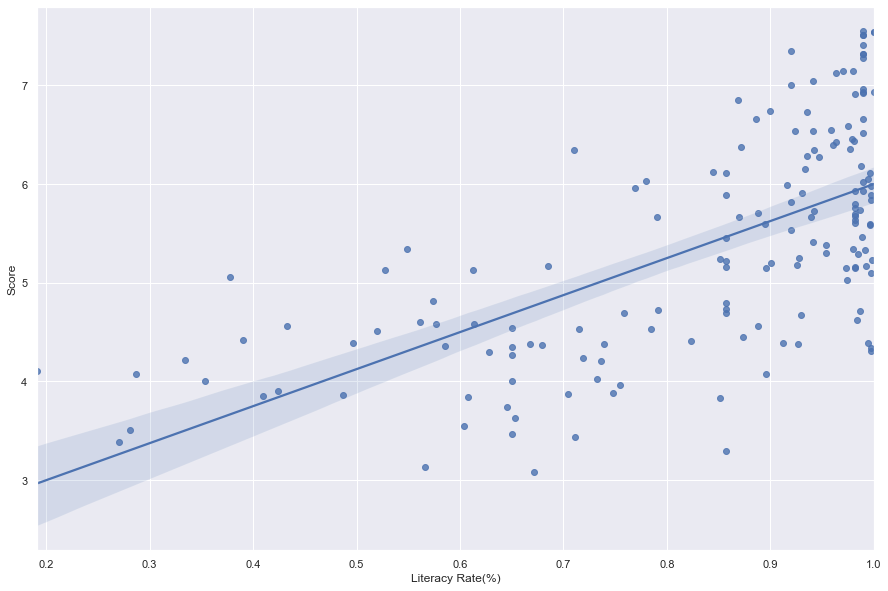

In [66]:
X=mean_df['Literacy Rate(%)']
Y=mean_df['Score']
sns.set(rc={'figure.figsize':(15,10)})

ax = sns.regplot(x=X, y=Y)

**from the general scatter plot it's clear that literacy rate is affecting the happiness score positively and the countries with higher literacy rate are happier than those who have lower literacy rate**

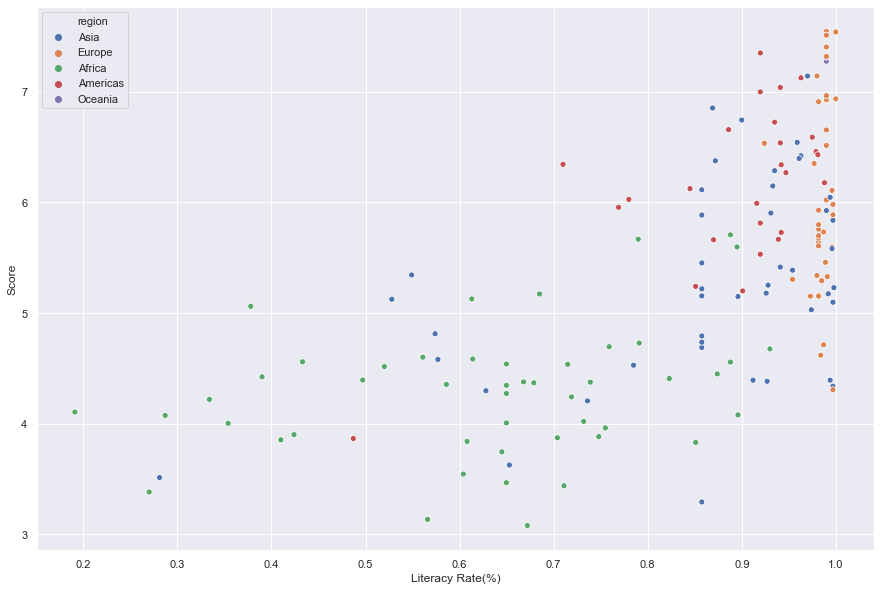

In [67]:
sns.scatterplot(data=mean_df, x="Literacy Rate(%)", y='Score', hue="region", palette="deep")

**by taking into consideration the different regions or continents it's clear that literacy rate is not affecting the happiness score similarly, for exmaple in Afirca it seems that higher literacy rates are not accombined by higher happiness score, but in contrast in Europe and Americas , higher literacy rates are accombined with higher happiness scores** 

In [68]:
mean_df

,country,region,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,Asia,27657145.0,652230.0,27.800000,0.031000,0.281000,0.068000,0.350000,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2017.0
1,Albania,Europe,2886026.0,28748.0,34.500000,0.007000,0.987000,0.017000,0.169000,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,2017.0
2,Algeria,Africa,40400000.0,2381741.0,35.300000,0.031000,0.790000,0.039000,0.103000,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,2017.0
3,Angola,Africa,25868000.0,1246700.0,58.600000,0.056000,0.704000,0.089000,0.280621,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,2016.5
4,Argentina,Americas,43590400.0,2780400.0,44.500000,0.035000,0.979000,0.208000,0.075000,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela (Bolivarian Republic of),Americas,31028700.0,916445.0,44.800000,0.044766,0.919778,0.041818,0.111794,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,2017.0
158,Vietnam,Asia,92700000.0,331212.0,35.600000,0.051635,0.857553,0.052703,0.112108,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,2017.0
159,Yemen,Asia,27478000.0,527968.0,37.700000,0.038000,0.653000,0.118000,0.350000,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,2017.0
160,Zambia,Africa,15933883.0,752612.0,54.600000,0.060000,0.614000,0.071000,0.150000,114.0,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430,2017.0


**from the scactter plot it appears that the countries with high literacy rate are happier as the two attirbutes are psositively correlated**

# Q3) What is the relative happiness ranking among the main contenents during the last five years and how it is changing with respect to time?

In [69]:
df_mean = df_countries_happiness.groupby(['region','Year'],as_index = False).mean()
df_mean

,region,Year,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Africa,2015,2.608570e+07,6.310942e+05,43.568676,0.044006,0.645227,0.066862,0.278532,124.772727,4.280909,0.445430,0.809101,0.321377,0.357429,0.114822,0.201191
1,Africa,2016,2.709420e+07,6.751350e+05,43.452433,0.047292,0.632719,0.068507,0.284715,124.833333,4.253690,0.539522,0.592854,0.277066,0.306954,0.112883,0.203207
2,Africa,2017,2.660151e+07,6.774713e+05,43.527322,0.043574,0.632777,0.067612,0.276759,122.681818,4.239500,0.559931,0.962439,0.264426,0.352025,0.101140,0.213328
3,Africa,2018,2.660151e+07,6.774713e+05,43.527322,0.043574,0.632777,0.067612,0.276759,123.227273,4.289364,0.495432,0.958977,0.302636,0.386386,0.092455,0.161523
4,Africa,2019,2.464046e+07,5.934776e+05,44.037391,0.043172,0.629866,0.063001,0.278637,122.266667,4.368289,0.498467,0.932244,0.444467,0.329378,0.094311,0.175244
5,Americas,2015,4.047691e+07,1.653862e+06,48.950000,0.057693,0.894046,0.051731,0.095890,43.833333,6.238708,0.917114,1.119732,0.718857,0.509053,0.127760,0.235437
6,Americas,2016,3.751117e+07,1.527867e+06,49.100142,0.051986,0.891043,0.049636,0.099090,45.346154,6.190385,1.030383,0.911780,0.627364,0.434417,0.115629,0.225438
7,Americas,2017,4.046977e+07,1.647993e+06,48.958333,0.056776,0.886630,0.050523,0.098598,47.416667,6.057542,1.049127,1.303529,0.627127,0.458322,0.098076,0.227643
8,Americas,2018,4.046977e+07,1.647993e+06,48.958333,0.056776,0.886630,0.050523,0.098598,47.375000,6.046542,0.939875,1.349167,0.669917,0.513375,0.088250,0.155125
9,Americas,2019,4.221323e+07,1.718647e+06,48.778261,0.058158,0.891744,0.052154,0.096146,48.130435,6.052739,0.965565,1.352000,0.824435,0.447696,0.084739,0.156609


In [70]:
regions_df=pd.pivot_table(df_mean,index=["Year"], columns="region",values="Score")
regions_df

region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2015,4.280909,6.238708,5.285556,6.051341,7.2850
2016,4.253690,6.190385,5.254386,6.066585,7.3235
2017,4.239500,6.057542,5.284721,6.104951,7.2990
2018,4.289364,6.046542,5.250909,6.178610,7.2980
2019,4.368289,6.052739,5.237727,6.268488,7.2675


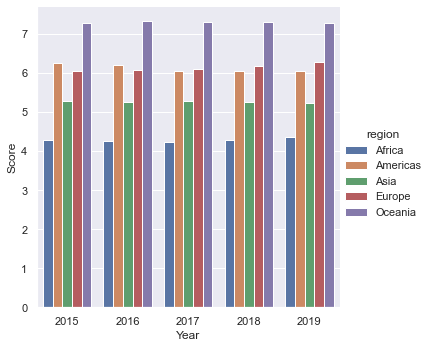

In [71]:
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(x="Year", y="Score", hue="region", kind="bar", data=df_mean)

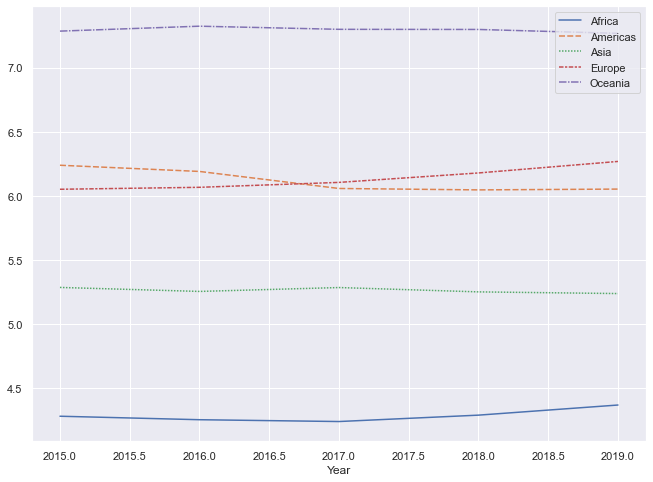

In [72]:
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(data=regions_df)

**from the line plot and the bar plot, it's clear that Africa is the least country in happiness score during the last five years and Oceania is the largest,Europe happiness score tends to increase and both asia and america are somehow constant during these five years.**

# Q4)what is the vaiance in happiness score in the different countries at the same continent and are the countries in the same continent affect the happiness score of each other?

In [73]:
df_var=df_countries_happiness.groupby(['region','Year'],as_index = False).var()

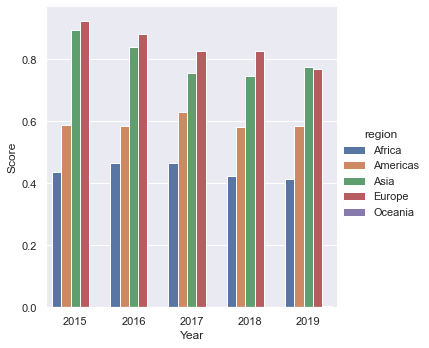

In [74]:
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(x="Year", y="Score", hue="region", kind="bar", data=df_var)

**From the barplot its clear that Europe and Asia are the regions with the maximum variance in hppiness score through the five years, but this variance is decreasing which means that the happiness score of the european and asian countries is becoming closer to each other and the european and asian countries are affecting each other.**

# B)countries_life_expectancey dataset

# Q5) What are the attributes that have impact on the life_expectancy for the different countries.

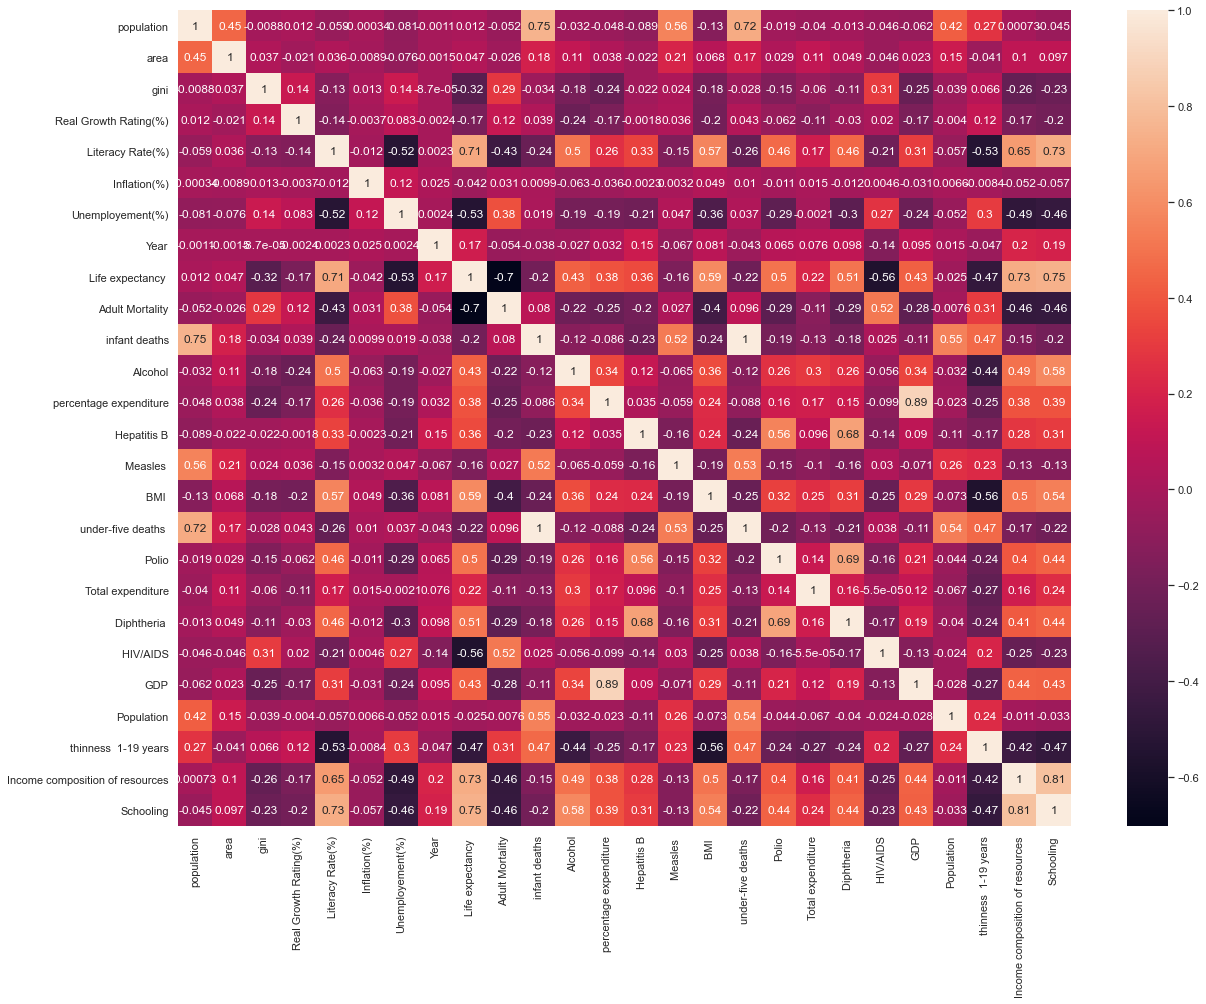

In [75]:
plt.figure(figsize = (20,15))
sns.heatmap(df_countries_expectancy.corr(),annot = True)

**from the heat map of the correlation ratio between all the attributes in the countries life expectancy data set it appears that:
'schooling','literacy_rate'and'income composition of resorurces' are highly and positively correlated with the 'life-expectancy' feature and 'HI/AIDS','Adult Mortality' and 'Unemployment' are negatively correlated with the 'life_expectancy' feature.**


# Q6) What is the ranking of the continents with respect to life expectancy and the change in it from year 2000 to 2015**

In [76]:
df2=df_countries_expectancy.groupby(['region','Year'],as_index = False).mean()
df2

,region,Year,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Life expectancy,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Africa,2000,2.192814e+07,556475.62963,44.580435,0.043079,0.645350,0.066366,0.277310,54.951736,...,79.498843,62.592653,5.020388,62.518733,7.935301,1758.543174,6.768386e+06,7.784804,0.408864,8.113940
1,Africa,2001,2.192814e+07,556475.62963,44.580435,0.043079,0.645350,0.066366,0.277310,55.273958,...,78.369213,64.500060,4.939832,61.907622,8.035301,1850.862182,1.131601e+07,7.264433,0.412105,8.297273
2,Africa,2002,2.192814e+07,556475.62963,44.580435,0.043079,0.645350,0.066366,0.277310,55.614699,...,76.924769,63.925986,5.019832,67.092807,8.031597,1633.511723,6.896502e+06,7.747767,0.415512,8.438312
3,Africa,2003,2.192814e+07,556475.62963,44.580435,0.043079,0.645350,0.066366,0.277310,55.640625,...,75.387731,64.425986,5.252795,64.259474,7.970486,1807.915682,1.039366e+07,7.225545,0.417883,8.577201
4,Africa,2004,2.192814e+07,556475.62963,44.580435,0.043079,0.645350,0.066366,0.277310,55.994329,...,73.776620,70.333394,5.468907,65.574289,7.759375,1735.495120,6.922350e+06,7.373693,0.426853,8.698161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Oceania,2011,3.919976e+06,848979.00000,40.100000,0.026664,0.904329,0.148037,0.090445,71.920000,...,1.400000,76.406250,6.521000,83.956250,0.190000,11918.537786,2.646604e+06,0.950000,0.669581,13.390000
76,Oceania,2012,3.919976e+06,848979.00000,40.100000,0.026664,0.904329,0.148037,0.090445,71.600000,...,1.400000,80.806250,6.263000,82.456250,0.190000,9084.984861,4.325356e+06,0.950000,0.672881,13.420000
77,Oceania,2013,2.457056e+06,530685.81250,40.100000,0.023701,0.912679,1.600094,0.178707,70.834349,...,0.875000,80.128906,7.742500,81.472656,0.143750,9522.923339,5.382914e+06,0.631250,0.558275,11.161985
78,Oceania,2014,3.919976e+06,848979.00000,40.100000,0.026664,0.904329,0.148037,0.090445,71.970000,...,1.400000,78.906250,6.749000,71.956250,0.160000,8360.922426,2.820908e+06,0.950000,0.679281,13.470000


In [77]:
regions_df2=pd.pivot_table(df2,index=["Year"], columns="region",values='Life expectancy ')
regions_df2

region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2000,54.951736,72.293371,68.847826,75.430769,69.420000
2001,55.273958,72.375189,69.491304,75.764103,69.890000
2002,55.614699,72.869129,69.367391,75.897436,70.030000
2003,55.640625,72.438826,69.667391,76.151282,70.910000
2004,55.994329,72.432765,69.834783,76.538462,70.600000
2005,57.177662,72.653977,70.169565,76.751282,70.720000
2006,57.436921,73.299432,70.643478,77.328205,71.360000
2007,58.044329,73.481250,70.902174,77.733333,71.050000
2008,58.955440,73.838826,71.104348,77.517949,71.400000


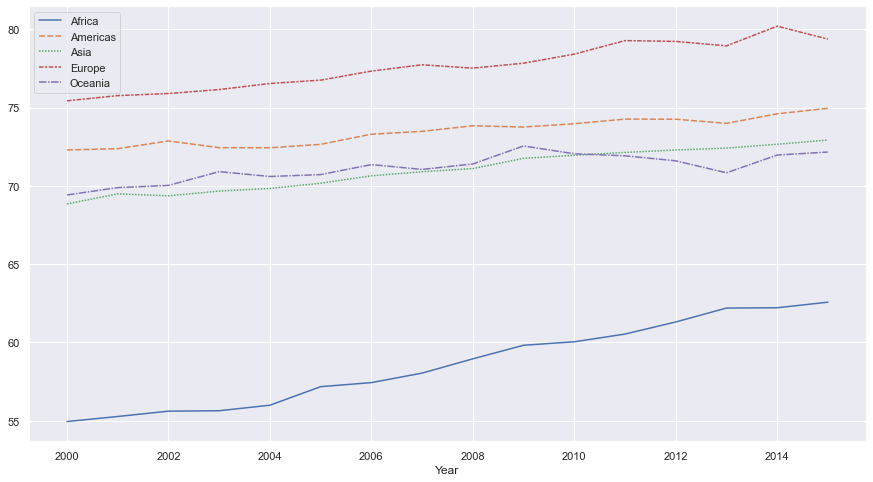

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=regions_df2)

**The line plot is showing That:
Europe is the highst continent with attribute life expectancy over the 15 years and Africa is the lowest.
the overall life expectacy of all the continents is increaseing over time.**

In [79]:
df_countries_expectancy_mean=df_countries_expectancy.groupby(['country','region'],as_index=False).mean()

In [80]:
df_countries_expectancy.columns

Index(['country', 'region', 'subregion', 'population', 'area', 'gini',
       'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)', 'Year', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

# Q7) what is the effect of literacy rate on the life expectancy? and does literacy rate affects life-expectancy by the same manner in the different continents? **

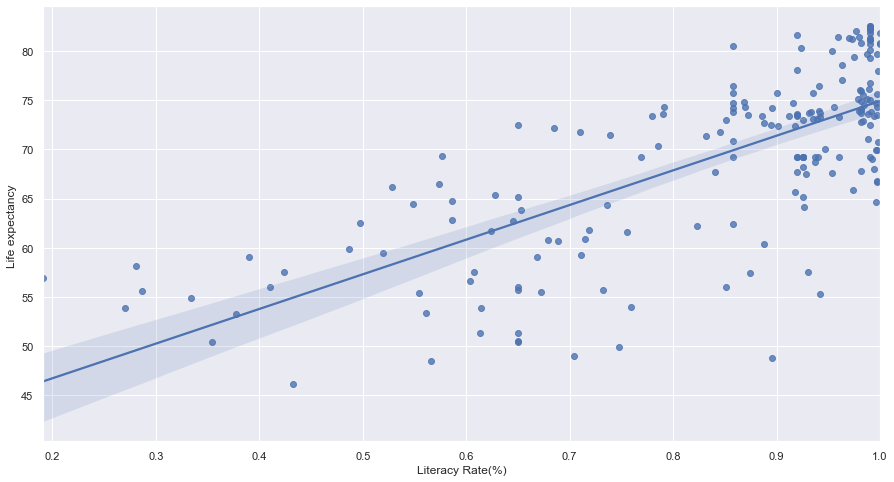

In [81]:
X=df_countries_expectancy_mean['Literacy Rate(%)']
Y=df_countries_expectancy_mean['Life expectancy ']
ax = sns.regplot(x=X, y=Y)

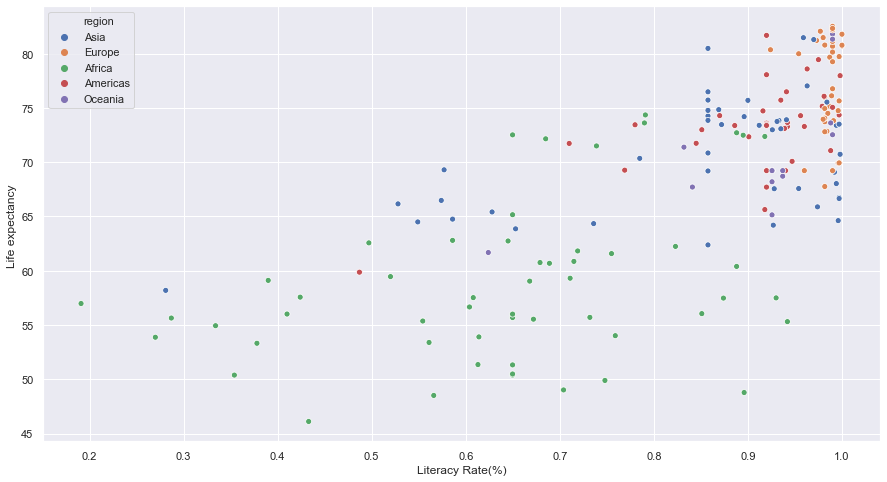

In [82]:
sns.scatterplot(data=df_countries_expectancy_mean, x="Literacy Rate(%)", y='Life expectancy ', hue="region", palette="deep")

**From the general bar plot it appears that the countries with high literacy rate are with higher life expectancy than the countries with lower literacy rate, however this empact is not the same in all the continents as in Africa the literacy-rate has less impact on life expectancy than it is in the other continents like Asia and Europ**

**Using questions 2 and 7 it's clear that literacy rate has a considerable impact on both happiness_score and life_expectancy so countries should pay great attention to it** 

# feature engineering

**1) adding new feature named "population density"="population" / "area"**

In [83]:
df_countries_expectancy['Population Density']=df_countries_expectancy['population']/df_countries_expectancy['area']
df_countries_expectancy

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Population Density
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,6.000,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1,42.403976
1,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,58.000,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0,42.403976
2,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,62.000,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9,42.403976
3,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,67.000,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8,42.403976
4,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,68.000,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5,42.403976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,75.625,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2,36.442515
2918,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,75.625,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5,36.442515
2919,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,75.625,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0,36.442515
2920,Zimbabwe,Africa,Eastern Africa,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,75.625,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8,36.442515


In [84]:
df_countries_expectancy['Population Density'].mean()

189.48834589600085

### Indicator Feature 
Now that we have a new meaningful feature Population Density. Let's create an indicator feature that tells us whether the coutnry is crowded or not based on a threshold.


# Q8) which type countries experience higher life-expectancy the crowded contries or the not corweded ones

In [85]:
df_countries_expectancy['crowded']= (df_countries_expectancy['Population Density'] >= 189)*1
df_countries_expectancy.sample(10)

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Population Density,crowded
130,Austria,Europe,Western Europe,8725931,83871.0,26.000000,0.004000,0.980000,0.021000,0.049000,...,11.140000,95.0,0.1,554.715320,8.479375e+06,1.8,0.887000,15.700000,104.039907,0
2479,Suriname,Americas,South America,541638,163820.0,52.900000,0.047000,0.947000,0.042000,0.090000,...,6.140000,87.0,0.6,7443.851780,5.261900e+04,3.5,0.696000,12.100000,3.306300,0
2014,Paraguay,Americas,South America,6854536,406752.0,52.400000,0.120000,0.939000,0.023000,0.066000,...,7.600000,89.0,0.1,359.992184,6.471170e+05,2.1,0.654000,11.900000,16.851880,0
1914,Korea (Democratic People's Republic of),Asia,Eastern Asia,25281000,120538.0,37.020513,0.051635,0.857553,0.052703,0.112108,...,5.937962,94.0,0.1,7261.652622,8.944052e+06,5.1,0.580416,10.847922,209.734689,1
2305,Singapore,Asia,South-Eastern Asia,5535000,710.0,48.100000,0.041000,0.959000,0.052000,0.019000,...,3.460000,97.0,0.1,39223.581870,8.944052e+06,2.1,0.873000,14.100000,7795.774648,1
1394,Kyrgyzstan,Asia,Central Asia,6047800,199951.0,36.200000,0.074000,0.992000,0.068000,0.086000,...,5.937962,97.0,0.1,3882.582610,8.944052e+06,3.3,0.662000,13.000000,30.246410,0
1896,Nigeria,Africa,Western Africa,186988000,923768.0,48.800000,0.062000,0.613000,0.087000,0.239000,...,3.300000,42.0,4.4,2755.297787,1.672973e+08,1.7,0.507000,9.700000,202.418789,1
596,Congo,Africa,Middle Africa,4741000,342000.0,47.300000,0.062000,0.668000,0.071000,0.280621,...,2.790000,82.0,3.5,7136.578425,8.944052e+06,8.0,0.558000,10.700000,13.862573,0
262,Belize,Americas,Central America,370300,22966.0,53.100000,0.025000,0.769000,0.013000,0.155000,...,5.810000,97.0,0.3,3933.012174,3.139290e+05,3.5,0.700000,12.700000,16.123835,0
2771,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,65110000,242900.0,34.000000,0.012026,0.981730,0.018973,0.102027,...,8.360000,92.0,0.1,11059.402966,8.944052e+06,0.7,0.800464,15.047253,268.052697,1


In [86]:
df2=df_countries_expectancy.groupby(['crowded','Year'],as_index = False).mean()
df2
crowded_df=pd.pivot_table(df2,index=["Year"], columns="crowded",values='Life expectancy ')
crowded_df


crowded,0,1
Year,,
2000,65.622188,70.689732
2001,65.981473,71.096875
2002,66.104330,71.534970
2003,66.327902,71.258780
2004,66.521473,71.532589
2005,67.103616,71.880208
2006,67.537188,72.482589
2007,67.906473,72.761161
2008,68.268616,73.111161


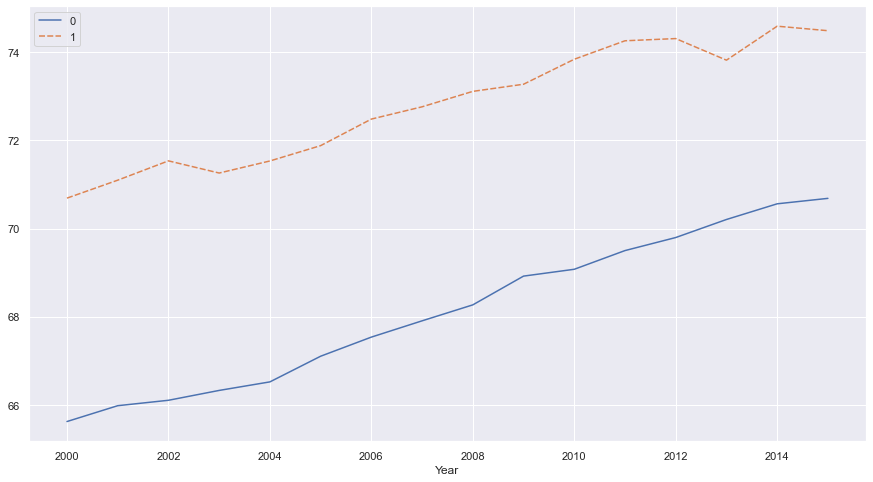

In [87]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=crowded_df)

**from the line plot it's clear that the crowded countries experience a higher life expectancy than the non crowded ones but both are increasing over time. It worth to say that the increase in the life expectancey of the non crouded countries is higher**

**1) convert the stauts column of the country from 2 categories into binary (0&1) which will ease the process using ml techniques**

In [89]:
df_countries_expectancy['Status']

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2917    Developing
2918    Developing
2919    Developing
2920    Developing
2921    Developing
Name: Status, Length: 2922, dtype: object

**feature engineering in the countries_life_expectancy data set**

In [90]:
df_countries_expectancy['Status']=df_countries_expectancy['Status'].apply(lambda x: 0 if x=="Developing" else 1).astype(int)
df_countries_expectancy['Status']

0       0
1       0
2       0
3       0
4       0
       ..
2917    0
2918    0
2919    0
2920    0
2921    0
Name: Status, Length: 2922, dtype: int32

In [91]:
df_countries_expectancy['Status'].unique()

array([0, 1])

**2) performing label encoding for the region and subregions attribute**

In [93]:
df_countries.columns

Index(['name', 'region', 'subregion', 'population', 'area', 'gini',
       'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)'],
      dtype='object')

In [94]:
import sklearn.preprocessing as preprocessing
df_countries_expectancy['region']=preprocessing.LabelEncoder().fit_transform(df_countries_expectancy['region'])
df_countries_expectancy['subregion']=preprocessing.LabelEncoder().fit_transform(df_countries_expectancy['subregion'])
df_countries_happiness['region']=preprocessing.LabelEncoder().fit_transform(df_countries_happiness['region'])
df_countries_happiness['subregion']=preprocessing.LabelEncoder().fit_transform(df_countries_happiness['subregion'])



In [95]:
df_countries_expectancy


,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Population Density,crowded
0,Afghanistan,2,17,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1,42.403976,0
1,Afghanistan,2,17,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0,42.403976,0
2,Afghanistan,2,17,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9,42.403976,0
3,Afghanistan,2,17,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8,42.403976,0
4,Afghanistan,2,17,27657145,652230.0,27.800000,0.03100,0.281000,0.068000,0.350000,...,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5,42.403976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zimbabwe,0,4,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2,36.442515,0
2918,Zimbabwe,0,4,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5,36.442515,0
2919,Zimbabwe,0,4,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0,36.442515,0
2920,Zimbabwe,0,4,14240168,390757.0,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8,36.442515,0


**3)scaling the population and area attributes with the min-max scaler because they are having huge numiric values compared to the other attributes and we would like to end up with smaller standard deviations, which can suppress the effect of outliers.**

In [99]:
df_countries_happiness['population']=MinMaxScaler().fit_transform(df_countries_happiness[["population"]]) 
df_countries_happiness['area']=MinMaxScaler().fit_transform(df_countries_happiness[["area"]]) 
df_countries_expectancy['population']=MinMaxScaler().fit_transform(df_countries_expectancy[["population"]]) 
df_countries_expectancy['area']=MinMaxScaler().fit_transform(df_countries_expectancy[["area"]]) 

In [100]:
df_countries_happiness

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Afghanistan,2,14,0.019841,0.038070,27.800000,0.03100,0.281000,0.068000,0.350000,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,2,14,0.019841,0.038070,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,2,14,0.019841,0.038070,27.800000,0.03100,0.281000,0.068000,0.350000,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,2,14,0.019841,0.038070,27.800000,0.03100,0.281000,0.068000,0.350000,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,2,14,0.019841,0.038070,27.800000,0.03100,0.281000,0.068000,0.350000,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Zimbabwe,0,4,0.010098,0.022801,44.580435,0.04275,0.649798,0.066366,0.280621,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
771,Zimbabwe,0,4,0.010098,0.022801,44.580435,0.04275,0.649798,0.066366,0.280621,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2016
772,Zimbabwe,0,4,0.010098,0.022801,44.580435,0.04275,0.649798,0.066366,0.280621,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,2017
773,Zimbabwe,0,4,0.010098,0.022801,44.580435,0.04275,0.649798,0.066366,0.280621,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018


In [101]:
df_countries_expectancy

,country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Population Density,crowded
0,Afghanistan,2,17,0.020078,0.038088,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.16,65.0000,0.1,584.259210,33736494.0,17.2,0.479,10.1,42.403976,0
1,Afghanistan,2,17,0.020078,0.038088,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.18,62.0000,0.1,612.696514,327582.0,17.5,0.476,10.0,42.403976,0
2,Afghanistan,2,17,0.020078,0.038088,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.13,64.0000,0.1,631.744976,31731688.0,17.7,0.470,9.9,42.403976,0
3,Afghanistan,2,17,0.020078,0.038088,27.800000,0.03100,0.281000,0.068000,0.350000,...,8.52,67.0000,0.1,669.959000,3696958.0,17.9,0.463,9.8,42.403976,0
4,Afghanistan,2,17,0.020078,0.038088,27.800000,0.03100,0.281000,0.068000,0.350000,...,7.87,68.0000,0.1,63.537231,2978599.0,18.2,0.454,9.5,42.403976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zimbabwe,0,4,0.010337,0.022819,44.580435,0.04275,0.649798,0.066366,0.280621,...,7.13,75.1875,33.6,454.366654,12777511.0,9.4,0.407,9.2,36.442515,0
2918,Zimbabwe,0,4,0.010337,0.022819,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.52,75.1875,36.7,453.351155,12633897.0,9.8,0.418,9.5,36.442515,0
2919,Zimbabwe,0,4,0.010337,0.022819,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.53,75.1875,39.8,57.348340,125525.0,1.2,0.427,10.0,36.442515,0
2920,Zimbabwe,0,4,0.010337,0.022819,44.580435,0.04275,0.649798,0.066366,0.280621,...,6.16,75.1875,42.1,548.587312,12366165.0,1.6,0.427,9.8,36.442515,0
